# Task-3 Car price prediction

# STEVE JOS C M

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [8]:
df.describe()             #describe the dataset

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.shape      

(301, 9)

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df.duplicated().sum()

2

In [14]:
df=df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [11]:
columns=['Selling_Price', 'Present_Price', 'Driven_kms','Owner']

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


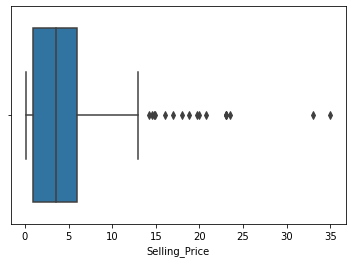

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


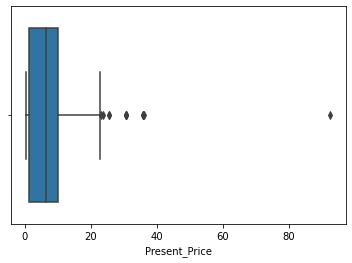

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


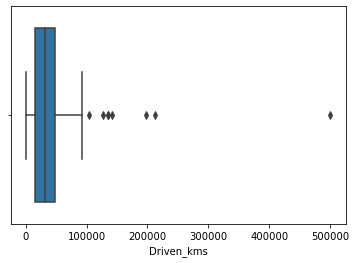

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


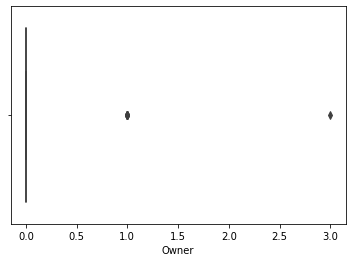

In [17]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


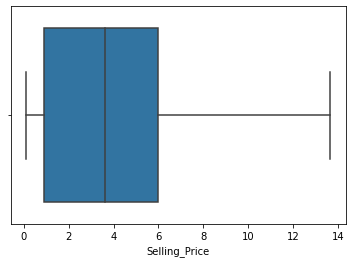

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


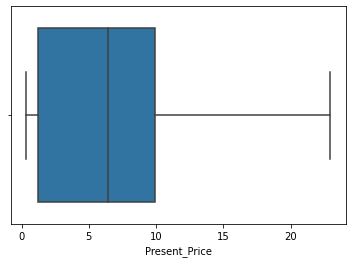

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


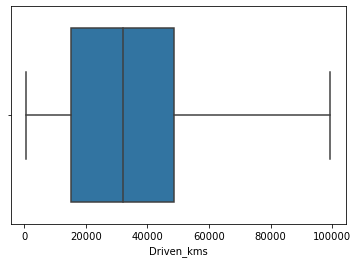

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


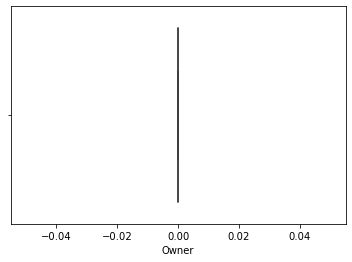

In [24]:
columns=['Selling_Price', 'Present_Price', 'Driven_kms','Owner']
for i in columns:
    Q1 = np.percentile(df[i],25,interpolation="midpoint")
    Q2 = np.percentile(df[i],50,interpolation="midpoint")
    Q3 = np.percentile(df[i],75,interpolation="midpoint")      #outliers removal method
    iqr=Q3-Q1
    low_limit=Q1-1.5*iqr
    up_limit=Q3+1.5*iqr

    index1=(df[i]>up_limit)
    index2=(df[i]<low_limit)

    index = df.loc[index1].index
    inde=df.loc[index2].index
    df.loc[list(index1),i]=up_limit
    df.loc[list(index2),i]=low_limit
    sns.boxplot(df[i])
    plt.show()


C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'type of the fuel used')

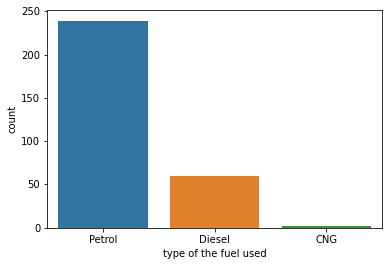

In [26]:
sns.countplot(df["Fuel_Type"])
plt.xlabel("type of the fuel used")

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'selling type')

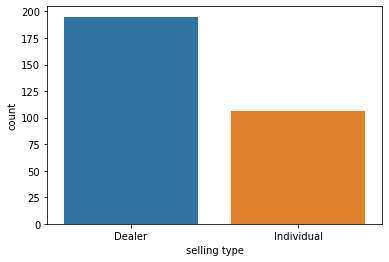

In [28]:
sns.countplot(df["Selling_type"])
plt.xlabel("selling type")

C:\Users\CELUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'type of transmission')

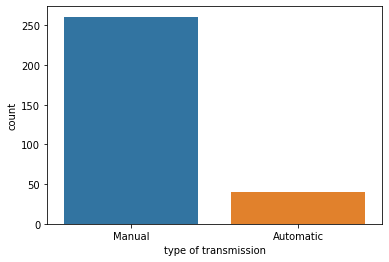

In [29]:
sns.countplot(df["Transmission"])
plt.xlabel("type of transmission")

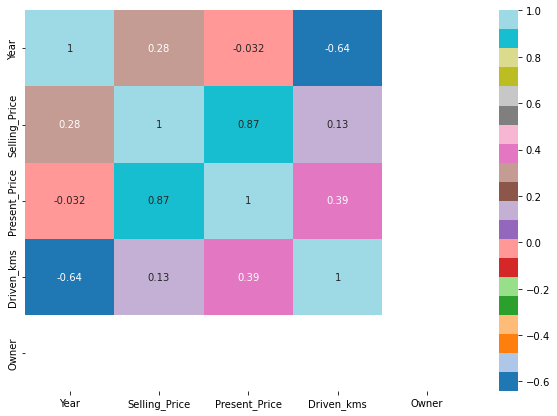

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="tab20")
plt.show()

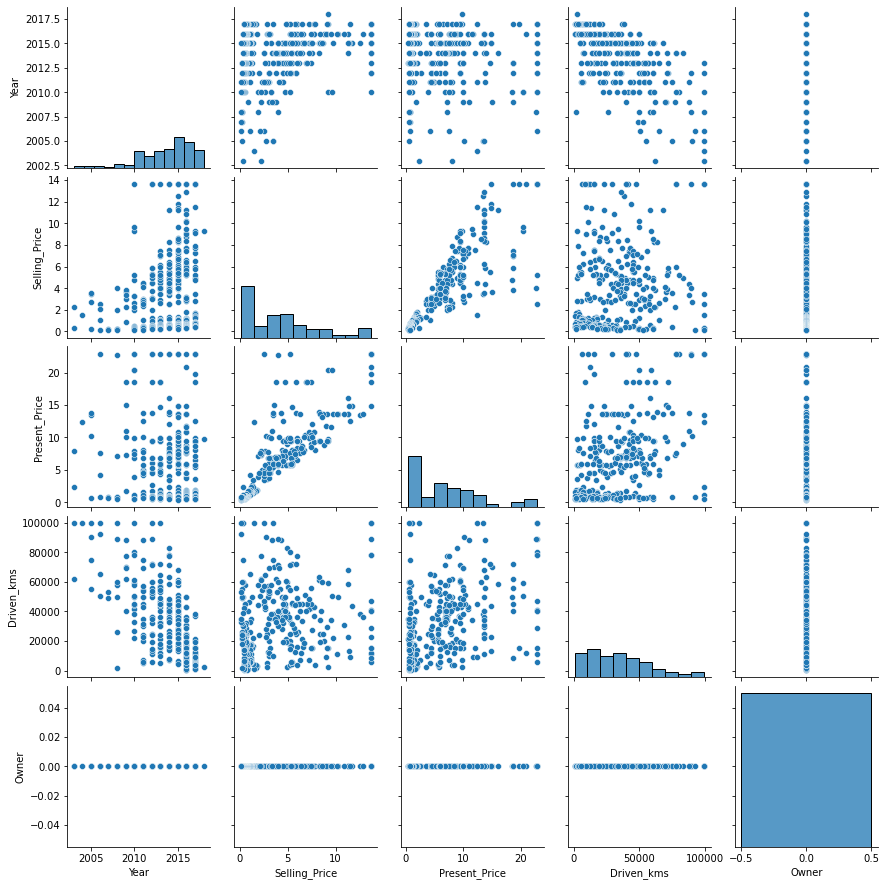

In [35]:
sns.pairplot(data=df)
plt.show()

In [70]:
cat_cols = df[['Fuel_Type','Selling_type','Transmission',"Owner"]]


In [71]:
cat_cols

,Fuel_Type,Selling_type,Transmission,Owner
0,Petrol,Dealer,Manual,0
1,Diesel,Dealer,Manual,0
2,Petrol,Dealer,Manual,0
3,Petrol,Dealer,Manual,0
4,Diesel,Dealer,Manual,0
...,...,...,...,...
296,Diesel,Dealer,Manual,0
297,Petrol,Dealer,Manual,0
298,Petrol,Dealer,Manual,0
299,Diesel,Dealer,Manual,0


In [72]:
encoder= LabelEncoder()
for i in cat_cols:
    cat_cols[i]=encoder.fit_transform(df[i])

C:\Users\CELUS\AppData\Local\Temp\ipykernel_12800\1368960256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols[i]=encoder.fit_transform(df[i])


In [73]:
cat_cols

,Fuel_Type,Selling_type,Transmission,Owner
0,2,0,1,0
1,1,0,1,0
2,2,0,1,0
3,2,0,1,0
4,1,0,1,0
...,...,...,...,...
296,1,0,1,0
297,2,0,1,0
298,2,0,1,0
299,1,0,1,0


In [74]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [75]:
num_cols=df[["Selling_Price","Present_Price","Driven_kms","Year"]]

In [76]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(num_cols)
cols = num_cols.columns
dataset = pd.DataFrame(scale, columns=cols)

In [77]:
dataset

,Selling_Price,Present_Price,Driven_kms,Year
0,0.239852,0.232877,0.267900,0.733333
1,0.343173,0.407424,0.429651,0.666667
2,0.527675,0.421122,0.064700,0.933333
3,0.202952,0.169244,0.047514,0.533333
4,0.332103,0.289439,0.424091,0.733333
...,...,...,...,...
296,0.693727,0.498453,0.338545,0.866667
297,0.287823,0.246575,0.601511,0.800000
298,0.239852,0.471940,0.883908,0.400000
299,0.841328,0.538224,0.085930,0.933333


In [78]:
Both_dataset=[cat_cols,dataset]

In [79]:
df_1=pd.concat(Both_dataset,axis=1)

In [80]:
df_1

,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price,Present_Price,Driven_kms,Year
0,2,0,1,0,0.239852,0.232877,0.267900,0.733333
1,1,0,1,0,0.343173,0.407424,0.429651,0.666667
2,2,0,1,0,0.527675,0.421122,0.064700,0.933333
3,2,0,1,0,0.202952,0.169244,0.047514,0.533333
4,1,0,1,0,0.332103,0.289439,0.424091,0.733333
...,...,...,...,...,...,...,...,...
296,1,0,1,0,0.693727,0.498453,0.338545,0.866667
297,2,0,1,0,0.287823,0.246575,0.601511,0.800000
298,2,0,1,0,0.239852,0.471940,0.883908,0.400000
299,1,0,1,0,0.841328,0.538224,0.085930,0.933333


In [64]:
ddf=df[["Year","Owner"]]

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [65]:
df_2=[df_1,dataset]

In [81]:
df_1=pd.concat(Both_dataset,axis=1)

In [88]:
df_1

,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price,Present_Price,Driven_kms,Year
0,2,0,1,0,0.239852,0.232877,0.267900,0.733333
1,1,0,1,0,0.343173,0.407424,0.429651,0.666667
2,2,0,1,0,0.527675,0.421122,0.064700,0.933333
3,2,0,1,0,0.202952,0.169244,0.047514,0.533333
4,1,0,1,0,0.332103,0.289439,0.424091,0.733333
...,...,...,...,...,...,...,...,...
296,1,0,1,0,0.693727,0.498453,0.338545,0.866667
297,2,0,1,0,0.287823,0.246575,0.601511,0.800000
298,2,0,1,0,0.239852,0.471940,0.883908,0.400000
299,1,0,1,0,0.841328,0.538224,0.085930,0.933333


In [89]:
df_1.isnull().sum()

Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Selling_Price    0
Present_Price    0
Driven_kms       0
Year             0
dtype: int64

# model building

In [90]:
y=df_1["Selling_Price"]
x=df_1.drop('Selling_Price',axis=1)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [103]:
model= LinearRegression()
model =model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [109]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("The Mean Squares Error is: ", mse)
print("The R-2 score is: ", r2_score(y_test, y_pred))

The Mean Squares Error is:  0.010731524004064713
The R-2 score is:  0.8465680643468934


In [108]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8465680643468934